# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [ ]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.


In [ ]:
# Visualiza el DataFrame
df = pd.read_csv("drug200.csv")
df.head()

metrica                         |                      Representación conceptual                                |  Foco principal
--------------------------------|-------------------------------------------------------------------------------|-------------------
Exactitud (Accuracy/Asertividad)|  Proporción de todas las predicciones correctas sobre el total de casos       | Ver el rendimiento general del modelo
Precisión                       |  De todo lo que se predijo como positivo ¿Qué fracción es realmente correcta  | Falsos positivos
Recall                          |  De todo lo que era relamente positivo                                        | Falsos negativos


##### Formulas
    Exactitud: nº total de clasificados correctamente de todos los individuos/ nº total de todas las entidades.
    Precisión: nº total de entidades positivas bien clasificadas / nº total de entidades positivas.
    Recall: nº total de clasificados correctamente de un único individuo / nº total de entidades de ese mismo individuo.


##### Abreviaturas comunes
    Tp --> Verdadero Positivo --> El modelo acierta: predice "SI" y es "SI"
    TN --> Verdadero Negativo --> El modelo acierta: predice "NO" y es "NO"
    FP --> Falso Positivo     --> El modelo se equivoca: predice "SI" y es "NO"
    FN --> Falso Negativo     --> El modelo se equivoca: predice "NO" y es "SI"

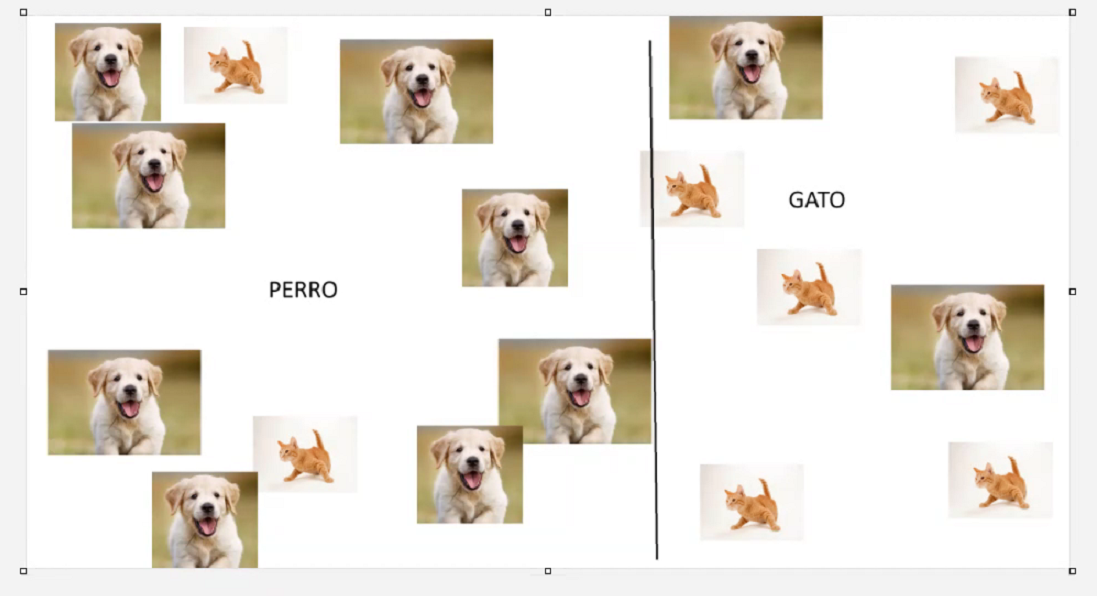

In [ ]:
df.info()

In [ ]:
df.min()

In [ ]:
df.max()


## <span style="color:green">2. Análisis de cada Variable</span>

In [ ]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns

print("Max Age:", df['Age'].max())
print("Min Age:", df['Age'].min())
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age,kde=True)

In [ ]:
# Género: cuenta cuántos hombres y mujeres hay
df["Sex"].value_counts()

In [ ]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="BP", hue="BP")

In [ ]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")

In [ ]:
# Crea un displot para Sodio Potasio
plt.figure(figsize=(9,5))
sns.displot(df.Na_to_K,kde=True)

In [ ]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="Drug", hue="Drug")
#Cuenta los medicamentos
df["Drug"].value_counts()

***

Con esto nos podemos dar cuenta de que las medicinas más dificiles de predecir van a ser la B y la C ya que para todo el modelo solo tienen 16 unidades de sus datos (Recordatorio: cuantos más datos mejor el modelo)

## <span style="color:green">3. Análisis de Relación entre Variables</span>


In [ ]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Age", hue="Drug",data=df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad vs Medicamento")

In [ ]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(['Sex','Drug']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y ="Counts", hue ="Sex", data =df_Sex_Drug)
plt.title("Género vs Medicamento")

In [ ]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
#Primero armar una tablita para poder graficarlas
df_BP_Drug = df.groupby(['BP','Drug']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y ="Counts", hue ="BP", data =df_BP_Drug)
plt.title("BP vs Medicamento")

In [ ]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
#Primero armar una tablita para poder graficarlas
df_Cholesterol_Drug = df.groupby(['Cholesterol','Drug']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y ="Counts", hue ="Cholesterol", data =df_Cholesterol_Drug)
plt.title("Cholesterol vs Medicamento")

In [ ]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Na_to_K_Drug = df.groupby(['Na_to_K','Drug']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Na_to_K", hue="Drug",data=df_Na_to_K_Drug)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K_Drug vs Medicamento")


In [ ]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Na_to_K", hue="Drug",data=df)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Medicamento")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [ ]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder #Funciona como ordinal encoder pero sin darle importancia al orden alfabéto de los datos, simplemente los convierte en números los nuemera por índice

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:
    label_encoder(l)

df.head()

In [ ]:
# Crear set de entrenamiento y set de prueba
x = df.drop("Drug", axis=1) #Variables independientes
y = df["Drug"]               #Variable dependiente

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11,shuffle=True)



El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=11

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [ ]:
## Crear modelo para medicamento (Solo vamos a preguntar con esto si son o si no son la medicina Y (ya que es la más popular con diferencia y así nos la quitamos del cómputo))
y_train_y = (y_train ==0)
y_test_y = (y_test ==0)


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [ ]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=11)
sgd.fit(x_train, y_train_y)

In [ ]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.iloc[0]]),y_train_y.iloc[0] #Sacará verdadero o falso dependiencdo si se le da la medicina Y o no

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [ ]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train, y_train_y, scoring='accuracy', cv=3) #3 valores, porque se ha entranado 3 veces cada vez con un trozo diferente de los datos como validación. Sacando el dato de porcentaje de exactitud o de acierto.

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [ ]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c, x_train, y_train_y, scoring='accuracy', cv=3) 

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [ ]:
# Matriz de confusión (lo explicado con perros y gatos)
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, x_train, y_train_y, cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y, y_train_pred)

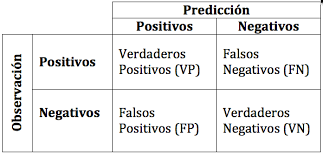

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [ ]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
P = precision_score(y_train_y, y_train_pred) #De todas las veces que predijo que era Y, cuántas veces acertó realmente
r = recall_score(y_train_y, y_train_pred)    #De todas las veces que era Y, cuántas veces predijo que era Y
P,r

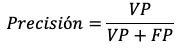

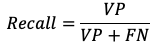

In [ ]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11)
rfc.fit(x_train, y_train_y)

#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(rfc, x_train, y_train_y, cv=3)
confusion_matrix(y_train_y, y_train_pred)

In [ ]:
#Calcular la precisión y recall con el nuevo clasificador 
P = precision_score(y_train_y, y_train_pred) #De todas las veces que predijo que era Y, cuántas veces acertó realmente
r = recall_score(y_train_y, y_train_pred)    #De todas las veces que era Y, cuántas veces predijo que era Y
P,r

In [ ]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y, y_train_pred)

Métrica F1-score, una medida de clasificadora que combina precisión y recall en un único nº --> "Como de amónicos están la precisión y recall"

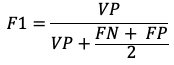

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

Umbral: nº a partir del cual el modelo separa polaridades "esto es positivo". Si la probabilidad > umbral --> positivo, sino --> negativo

In [ ]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,0,8,0]])
y_score

In [ ]:
#Graficar la precisión y recall 
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [ ]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

In [ ]:
#Arroja la precisión y recall para un umbral de 90
y_tain_90 = (y_scores >= umbral_90)
p = precision_score(y_train_y, y_tain_90)
r = recall_score(y_train_y, y_tain_90)

p,r

***

### <span style="color:blue">6.5 Curva ROC</span> (Característica Operativa del receptor)


Grafica Recall contra el porcentaje de Falsos Positivos

In [ ]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales_roc = roc_curve(y_train_y, y_scores)

In [ ]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC (Formando un triángulo rectángulo) y la línea punteada porque existe una mayor área bajo la curva. Entonces, lo que hay que intentar sacar ahora es el mejor modelo con lo que tenemos.

    El modelo que tenga mayor area bajo la curva será el mejor modelo (Y es lo siguiente que hacemos)

In [ ]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y, y_scores)

In [ ]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")
y_scores_forest = y_forest[:,1] #Solo nos quedamos con la probabilidad de que sea 1 (medicina Y)

In [ ]:
#Graficar la curva ROC y la predicción de random forest 
fpr_forest, tpr_forest, umbrales_roc_forest = roc_curve(y_train_y, y_scores_forest)
plt.plot(fpr, tpr, label="Curva ROC SGD")
plt.plot(fpr_forest, tpr_forest, label="Curva ROC Random Forest")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y, y_scores_forest)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


Por ahora solo hemos hecho si era la medicina Y o no, ahora vamos a hacerlo con todas las medicinas (necesitaremos nuevos métodos)

Hay muchos métodos de clasificación pero los principales que vamos a usar son:

    1º Que pasa a binario como hemos hecho con la Y, pero con todas las clases, de ahí se saca un porcentaje y determina cual es la medicina deseada en este caso.

    2º Uno vs uno y la unidad que "ganó" más veces es la que sale "victoriosa" 

In [ ]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
sample = pd.DataFrame([[25, 0, 0, 167, 1]], columns=x_train.columns)
svm.predict(sample)

In [ ]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function(sample)
#Decidirá por el qué tenga mayor puntaje

In [ ]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train, y_train)
#Predecir a un humano ahora con este clasificador
svm.predict(sample)

In [ ]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function(sample)

In [ ]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train, y_train)

In [ ]:
sgd.predict(sample)

***

## <span style="color:green">8. Analizar Errores</span>

In [ ]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

In [ ]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
cnf_mz = confusion_matrix(y_train, y_train_pred)
cnf_mz #Los números fuera de la diagonal son los falsos positivos

In [ ]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
cnf_mz_sgd = confusion_matrix(y_train, y_train_pred)
cnf_mz_sgd

Hay algunos fallos pero al operar todo correctamente entendemos que es por falta de datos

## Tarea:

Hacer este script con un CSV de Kaggle adaptando lo que demande el propio CSV

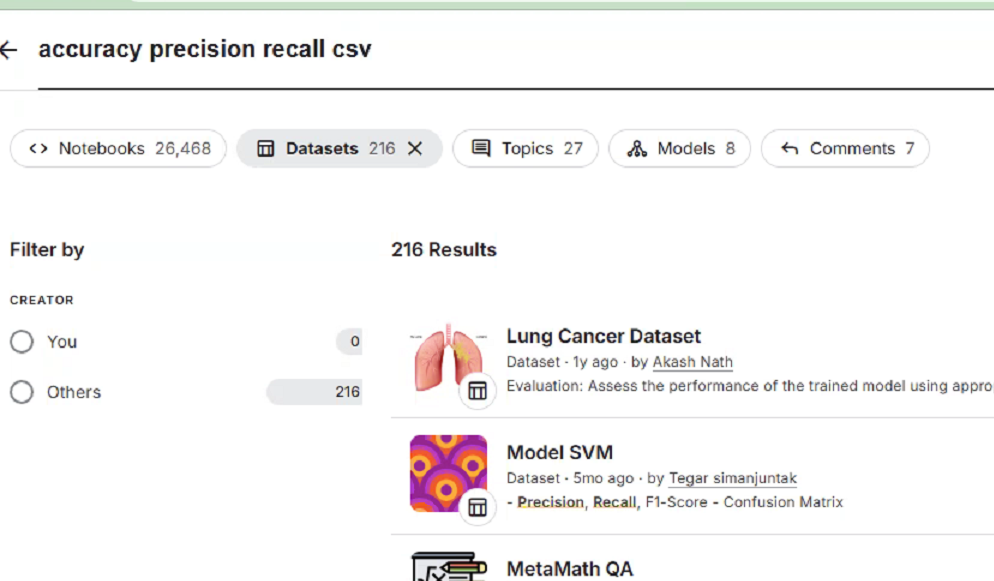